## Introduction 

#### The objective of the project was for exploration and testing of different methods of machine learning. There are many implications that you can acquire from the robust data available in today's day and age and we wanted to see if we could exploit some of the ideas so that we might have a better understanding of how the market performs. Many say you can not predict the market. We wanted to encounter and explore this challenge for ourselves. We used multiple different methods to determine the best features to use for the model, then we deployed some models using neural networks to help us understand the behaviors of the ever changing market place.

#### Accurate prediction of the stock market would be tremendous for the financial industry or anybody for that matter and the reason is apparent. In reality, we know that this is a very difficult task and no one has quite been able to perfect the algorithm, that being said, we only hope to be inspired by the project to develop a better model in the future based on the same ideas that we deployed for this project. The number one rule when talking about the market is 'never lose money', but as with life we know that we know that risk comes from those that are not prepared or those that do not know what we are doing. Technology is far from being able to predict the future, but if we understand the data and can determine a way to leverage its' insights to make better investments with higher returns.

#### “Forecasts may tell you a great deal about the forecaster; they tell you nothing about the future.” -Warren Buffet


## Introduction to the Data

#### The S&P 500 data is available online through various financial data aggregators, we used Alpha Vantage API to procure our data. We collected the obvious ones: 'Open', 'Close' etc. but we also wanted to see if factors like method of moments of weighted moving average numbers would help us in better predicting the 'adjust_close' for the following day.

### Import Statements and Data Import

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpha_vantage
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso
from pandas import Series
import time
import csv 
import json
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from ta import *
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from IPython.display import display
import io
plt.rcParams['figure.figsize'] = (18, 12)
file='SP500hist_data.csv'

data=pd.DataFrame()
data=pd.read_csv('SP500hist_data.csv',header=0,encoding = 'unicode_escape')


#take out the comma in string objects and convert them to a floating point #
data['Price'] = data["Price"].apply(lambda x: float(x.split()[0].replace(',', '')))
data['Open'] = data["Open"].apply(lambda x: float(x.split()[0].replace(',', '')))
data['High'] = data["High"].apply(lambda x: float(x.split()[0].replace(',', '')))
data['Low'] = data["Low"].apply(lambda x: float(x.split()[0].replace(',', '')))
data['Change %'] = data["Change %"].apply(lambda x: float(x.split()[0].replace('%', '')))

# getting the data to where we can work with it
stock_price=data['Price']
opening_price=data["Open"]
daily_high=data['High']
daily_low=data['Low']
closing_price=data['close']
adjusted_close=data['adjusted_close']
daily_volume=data['volume']
daily_change_percent=data['Change %']
rsi=data['RSI']
sma=data['SMA']
ema=data['EMA']
mac_d=data['MACD']
macd_hist=data['MACD_Hist']
macd_signal=data['MACD_Signal']
slow_D=data['SlowD']
slow_K=data['SlowK']
wma=data['WMA']
real_upper_band=data['Real Upper Band']
real_lower_band=data['Real Lower Band']
real_middle_band=data['Real Middle Band']
chaikin_AD=data['Chaikin A/D']
obv=data['OBV']
mom=data['MOM']
willr=data['WILLR']
adx=data['ADX']
cci=data['CCI']
aroon_up=data['Aroon Up']
aroon_down=data['Aroon Down']
 #I made this list just case we need to use it later to build model   &&   #  maybe take out daily change percentage
feature_list = ['Price','Open','High','Low', 'close','adjusted_close', 'volume','Change %','RSI','SMA','EMA',\
    'MACD','MACD_Hist','MACD_Signal','SlowD','SlowK','WMA','Real Upper Band','Real Lower Band',\
        'Real Middle Band','Chaikin A/D','OBV','MOM','WILLR','ADX','CCI','Aroon Up','Aroon Down']


## LASSO REGRESSION

#### The Lasso Regression was used to determine if we could 'shrink' our data as to obtain appropriate variable selection, a model selection method used in linear regression. The hope was to obtain the best subset of predictor variables that would seek to minimize the error produced by our model's prediction. The regression model chooses the variables with a non-zero regressor coefficients are those that are most directly related to the predicted variable (response variable).

In [23]:
Xs = data.drop(['adjusted_close'], axis=1)
y = data['adjusted_close'].values.reshape(-1,1)

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(Xs, y)

print("The best parameter is:", lasso_regressor.best_params_)
print("The best score is:", lasso_regressor.best_score_)

/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

The best parameter is: {'alpha': 10}
The best score is: -0.17132929529950225


/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: Convergen

## PRE-PROCESSING For Lasso Regressor

In [25]:
# Separate the train and test data 80/20
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=.2, random_state=10)
#Implement LASSO REGRESSION
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,y_train)
pred_cv = lassoReg.predict(X_test)
# RETRIEVE MSE
mse = np.mean((pred_cv - y_test)**2)
print("MSE for lasso Regression:",mse)
print("Score for Lasso Regression:",lassoReg.score(X_test,y_test))
coeffs = lassoReg.coef_       
print("Lasso Coefficients:",coeffs)
coeffs = lassoReg.sparse_coef_  
print("Lasso Sparse coefficients:",coeffs)
coeffs = lassoReg.intercept_    
print("Lasso Intercept:",coeffs)
# print(Xs)

MSE for lasso Regression: 190372.3800725041
Score for Lasso Regression: 0.9999976042192588
Lasso Coefficients: [ 6.16292989e-03  9.99991814e-01  7.95763104e-03  7.50228037e-04
  2.19927916e-03 -6.85762543e-03  7.81884985e-11  0.00000000e+00
  0.00000000e+00  4.17858427e-03  4.88325816e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.60696660e-03
 -4.35177030e-04 -1.42959848e-03 -4.95779300e-03  2.61040179e-03
 -2.35679307e-11 -1.64888939e-11  1.18254608e-03  7.67458036e-03
  0.00000000e+00 -1.71294298e-03 -3.86862381e-04  1.10017222e-03]
Lasso Sparse coefficients:   (0, 0)	0.006162929891840596
  (0, 1)	0.9999918137648593
  (0, 2)	0.00795763104392329
  (0, 3)	0.0007502280374001905
  (0, 4)	0.0021992791595731517
  (0, 5)	-0.006857625428325255
  (0, 6)	7.818849852146865e-11
  (0, 9)	0.004178584267200188
  (0, 10)	0.0048832581583677795
  (0, 15)	0.0026069665969023687
  (0, 16)	-0.0004351770301335738
  (0, 17)	-0.001429598480339515
  (0, 18)	-0.00495779300113591
  (0,

Looking @ the result above we notice that the results give us sparse coefficients for 'Open','Close' & 'Volume'. 
We are going to come back and build a model with just those features in the near future but for now, we just want to see 
how the model performs if we use all the features of the data (28 total). 

$$•OpenCoef_=0.96322411$$
$$•CloseCoef_=0.00533752$$
$$•VolumeCoeff_=0.00120249$$
$$•LassoIntercept=69.49548245 (Look up what this intercept is used for) Bias maybe?$$
$$The best parameter is: {'alpha': 10}$$
$$The best score is: -0.17132929529950225$$


## The score of this model is bad.




In [26]:
## PCA
#First need to normalize the stocks

def get_normalized_data(data,feature_list,scaler=None):
    
    # Initialize a scaler, then apply it to the features
    if scaler=='MinMaxScaler()':
        scaler = MinMaxScaler()
        data[feature_list] = scaler.fit_transform(data[feature_list])
    if scaler=='StandardScaler()':
        scaler=StandardScaler()
        data[feature_list] = scaler.fit_transform(data[feature_list])

    return data
normalized_stocks=get_normalized_data(data,feature_list,scaler='MinMaxScaler()')
print(normalized_stocks.head())

   Day     Price      Open      High       Low     close  adjusted_close  \
0    1  0.026940  0.035313  0.021225  0.021790  0.026940        0.026940   
1    2  0.052212  0.027758  0.037986  0.035031  0.052213        0.052213   
2    3  0.052123  0.049947  0.038257  0.054619  0.052123        0.052123   
3    4  0.055010  0.050063  0.043146  0.057367  0.055011        0.055011   
4    5  0.055916  0.053943  0.044618  0.054127  0.055916        0.055916   

     volume  Change %       RSI  ...  Real Lower Band  Real Middle Band  \
0  0.332060  0.370861  0.556238  ...         0.000000          0.000000   
1  0.385988  0.621413  0.647249  ...         0.010592          0.006058   
2  0.326432  0.451435  0.646764  ...         0.020351          0.011501   
3  0.321233  0.471302  0.656631  ...         0.033754          0.017255   
4  0.353871  0.458057  0.659818  ...         0.043793          0.022055   

   Chaikin A/D       OBV       MOM     WILLR       ADX       CCI  Aroon Up  \
0     0.000000

/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## PCA

#### The reason we decided to employ principal component analysis is because the data was difficult to conceptualize in N-dimensions. PCA reduces the dimensionality of the data set and does by excluding variables lighly or heavily correlated to each other, as well as being able to retain the the maximum variation present within our data. We scaled our data so that this would work and the tools employed effectively summarize each instances with a lot less characteristics (features).

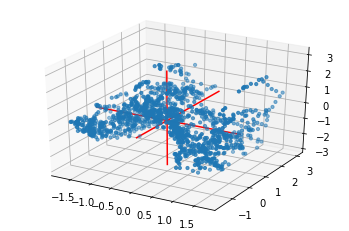

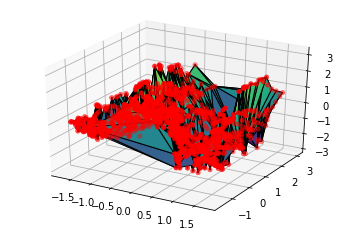

array([9.99994297e-01, 2.64916430e-06, 1.04821014e-06])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [5]:
import seaborn as sns
from mpl_toolkits import mplot3d
def plotPCA(normalized_stocks):
    pca = PCA(n_components=3,whiten=True)
    principalComponents = pca.fit_transform(normalized_stocks)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
    finalDf = pd.concat([principalDf, data[['adjusted_close']]], axis = 1)
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'], cmap="Set2_r", s=10)


    # make simple, bare axis lines through space:
    xAxisLine = ((min(principalDf['Principal Component 1']), max(principalDf['Principal Component 1'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(principalDf['Principal Component 2']), max(principalDf['Principal Component 2'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(principalDf['Principal Component 3']), max(principalDf['Principal Component 3'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
    plt.show()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'],cmap='viridis', edgecolor='black')
    ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'], c='r', cmap='viridis', linewidth=0.5)
#     targets = data['adjusted_close']
#     colors = ['r', 'g', 'b']
#     for target in targets:
#         indicesToKeep = finalDf['adjusted_close'] == target
#         ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
#                    , finalDf.loc[indicesToKeep, 'Principal Component 2']
#                    , s = 40)
    
#     ax.grid()
    plt.show()
    display(pca.explained_variance_ratio_)
    display(pca)
plotPCA(normalized_stocks)



## Correlation matrix and cluster heat map of the Features & breakdown

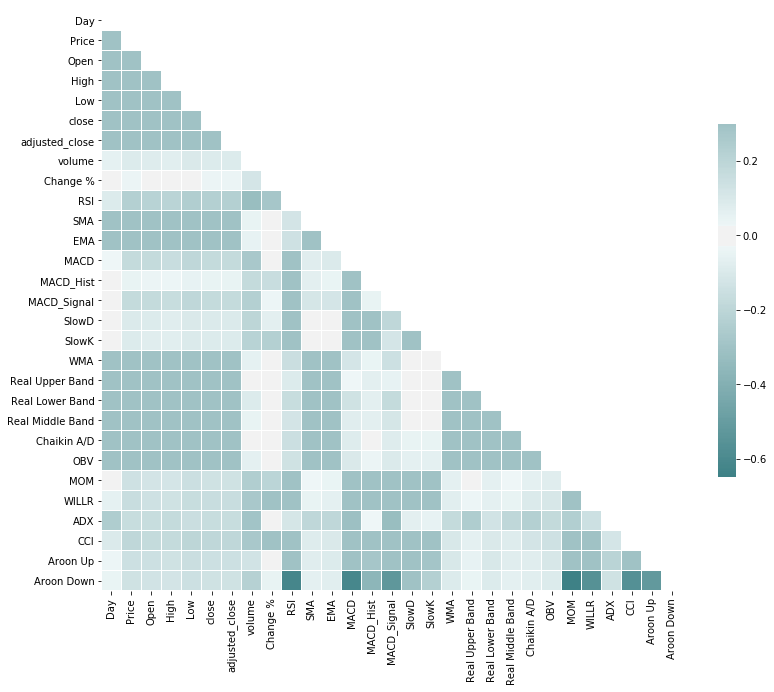

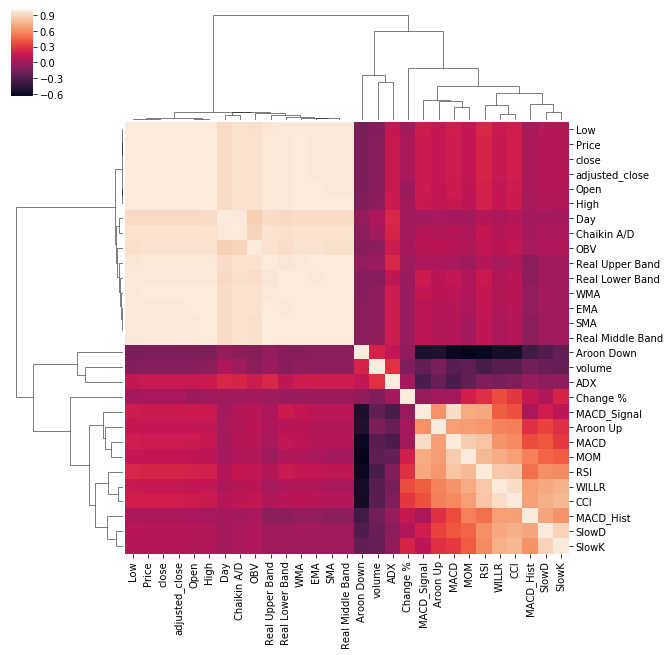

In [6]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13,13))
cmap = sns.diverging_palette(200, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.clustermap(corr)

## Linear Regression

In [7]:

data_2=pd.DataFrame()
data_2=pd.read_csv('SP500hist_data.csv',header=0,encoding = 'unicode_escape')
#take out the comma in string objects and convert them to a floating point #
data_2['Price'] = data_2["Price"].apply(lambda x: float(x.split()[0].replace(',', '')))
data_2['Open'] = data_2["Open"].apply(lambda x: float(x.split()[0].replace(',', '')))
data_2['High'] = data_2["High"].apply(lambda x: float(x.split()[0].replace(',', '')))
data_2['Low'] = data_2["Low"].apply(lambda x: float(x.split()[0].replace(',', '')))
data_2['Change %'] = data_2["Change %"].apply(lambda x: float(x.split()[0].replace('%', '')))
# print(data_2.head())

def scale_range(x, input_range, target_range):
    
    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range
def train_test_split_linear_regression(data_2):
    
    # Create numpy arrays for features and targets
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays for scikit learn
    # fix this later
    for index, row in data.iterrows():
        # print([np.array(row['close'])])
        feature.append([row['Day']])
        label.append([(row['adjusted_close'])])
        

    # Regularize the feature and target arrays and store min/max of input data for rescaling later
    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = .2
    split = int(math.floor(len(data['Day']) * split))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range
X_train, X_test, y_train, y_test, label_range= train_test_split_linear_regression(data_2)


## Build Model (Actually we should made a Time Series LinREG model)

In [8]:
def build_model(X, y):
    
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod = linear_model.LinearRegression()  # defining the linear regression model
    
    linear_mod.fit(X, y)  # fitting the data points in the model

    return linear_mod
def predict_prices(model, x, label_range):
    
    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()
print("Open   --- mean :", np.mean(data_2['Open']),  "  \t Std: ", np.std(data_2['Open']),  "  \t Max: ", np.max(normalized_stocks['Open']),  "  \t Min: ", np.min(normalized_stocks['Open']))
print("Close  --- mean :", np.mean(data_2['close']), "  \t Std: ", np.std(data_2['close']), "  \t Max: ", np.max(normalized_stocks['close']), "  \t Min: ", np.min(normalized_stocks['close']))
print("Volume --- mean :", np.mean(data_2['volume']),"  \t Std: ", np.std(data_2['volume']),"  \t Max: ", np.max(normalized_stocks['volume']),"  \t Min: ", np.min(normalized_stocks['volume']))


Open   --- mean : 2292.826263650546   	 Std:  316.47428684074714   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 2293.1047418876756   	 Std:  316.3134413159346   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 3592644326.6131043   	 Std:  692739777.4174446   	 Max:  1.0000000000000002   	 Min:  0.0


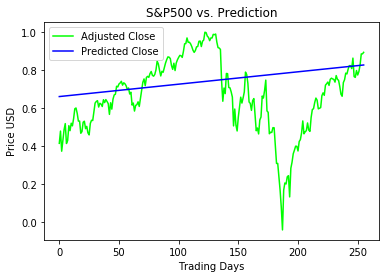

Model Coefficient: [[0.83420828]]
Mean squared error: 0.07
R2= 0.68


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
def plot_prediction(actual, prediction, title='S&P500 vs. Prediction', y_label='Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()
# Building the model for simple linear regression
model=build_model(X_train,y_train)
simple_predictions=predict_prices(model,X_test, label_range)
plot_prediction(y_test,simple_predictions)
print('Model Coefficient:',model.coef_)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Mean squared error: %.2f"
      % mean_squared_error(X_train, y_train))
print('R2= %.2f' % r2_score(X_train, y_train))





## LSTM Model (Long-Short Term Memory)

#### Given stock price prediction is a sequence prediction problem, a Long Short Term Memory (LSTM) neural networks is useful since it has memory, as in, it is able to store past stock prices because it doesn't have vanishing gradient affecting its performance.

#### LSTMs for time series modeling are more effective to detecting relationships that are nonlinearly and process data with multiple dimensions in a nonlinear fashion.

## Preprocessing for LSTM model

In [34]:
import os
normalized_stocks=data
normalized_stocks=normalized_stocks.drop('Day',1)
display(normalized_stocks.shape)
display(normalized_stocks.head())
print(normalized_stocks.head(2))

(1282, 28)

,Price,Open,High,Low,close,adjusted_close,volume,Change %,RSI,SMA,...,Real Lower Band,Real Middle Band,Chaikin A/D,OBV,MOM,WILLR,ADX,CCI,Aroon Up,Aroon Down
0,0.026940,0.035313,0.021225,0.021790,0.026940,0.026940,0.332060,0.370861,0.556238,0.000000,...,0.000000,0.000000,0.000000,0.031250,0.640072,0.829307,0.203487,0.703767,0.95,0.15
1,0.052212,0.027758,0.037986,0.035031,0.052213,0.052213,0.385988,0.621413,0.647249,0.006058,...,0.010592,0.006058,0.005386,0.045139,0.748765,0.983226,0.207146,0.769049,1.00,0.10
2,0.052123,0.049947,0.038257,0.054619,0.052123,0.052123,0.326432,0.451435,0.646764,0.011501,...,0.020351,0.011501,0.005386,0.034722,0.727604,0.980377,0.210820,0.793320,1.00,0.05
3,0.055010,0.050063,0.043146,0.057367,0.055011,0.055011,0.321233,0.471302,0.656631,0.017255,...,0.033754,0.017255,0.003591,0.045139,0.738303,0.961924,0.217985,0.818105,1.00,0.00
4,0.055916,0.053943,0.044618,0.054127,0.055916,0.055916,0.353871,0.458057,0.659818,0.022055,...,0.043793,0.022055,0.005386,0.059028,0.705512,0.948588,0.221110,0.810666,1.00,0.00


      Price      Open      High       Low     close  adjusted_close    volume  \
0  0.026940  0.035313  0.021225  0.021790  0.026940        0.026940  0.332060   
1  0.052212  0.027758  0.037986  0.035031  0.052213        0.052213  0.385988   

   Change %       RSI       SMA  ...  Real Lower Band  Real Middle Band  \
0  0.370861  0.556238  0.000000  ...         0.000000          0.000000   
1  0.621413  0.647249  0.006058  ...         0.010592          0.006058   

   Chaikin A/D       OBV       MOM     WILLR       ADX       CCI  Aroon Up  \
0     0.000000  0.031250  0.640072  0.829307  0.203487  0.703767      0.95   
1     0.005386  0.045139  0.748765  0.983226  0.207146  0.769049      1.00   

   Aroon Down  
0        0.15  
1        0.10  

[2 rows x 28 columns]


In [35]:
def train_test_split_lstm(stocks, prediction_time=1, test_data_size=300, unroll_length=50):
    
    # training data
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].values
    y_train = stocks[prediction_time:-test_data_cut]['adjusted_close'].values

    # test data
    x_test = stocks[0 - test_data_cut:-prediction_time].values
    y_test = stocks[prediction_time - test_data_cut:]['adjusted_close'].values

    return x_train, x_test, y_train, y_test


def unroll(data, sequence_length=24):
    
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)
xTrain, xTest,yTrain, yTest = train_test_split_lstm(normalized_stocks, 5)

unroll_length = 50

xTrain = unroll(xTrain, unroll_length)
xTest = unroll(xTest, unroll_length)
yTrain = yTrain[-xTrain.shape[0]:]
yTest = yTest[-xTest.shape[0]:]


## Get the shapes of the data
print("x_train", xTrain.shape)
print("y_train", yTrain.shape)
print("x_test", xTest.shape)
print("y_test", yTest.shape)
# os.environ['KMP_DUPLICATE_LIB_OK']='True'






x_train (876, 50, 28)
y_train (876,)
x_test (296, 50, 28)
y_test (296,)


## Basic LSTM ->Build the model

In [36]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        100,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model
model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.05)

predictions = model.predict(xTest)

compilation time :  0.034387826919555664
Train on 832 samples, validate on 44 samples
Epoch 1/5
832/832 [==============================] - 19s 23ms/step - loss: 0.0108 - val_loss: 6.9553e-04
Epoch 2/5
832/832 [==============================] - 10s 12ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 3/5
832/832 [==============================] - 10s 13ms/step - loss: 0.0015 - val_loss: 3.6007e-04
Epoch 4/5
832/832 [==============================] - 11s 13ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 5/5
832/832 [==============================] - 12s 14ms/step - loss: 0.0013 - val_loss: 0.0026


## Plot the Basics LSTM model before improvement 

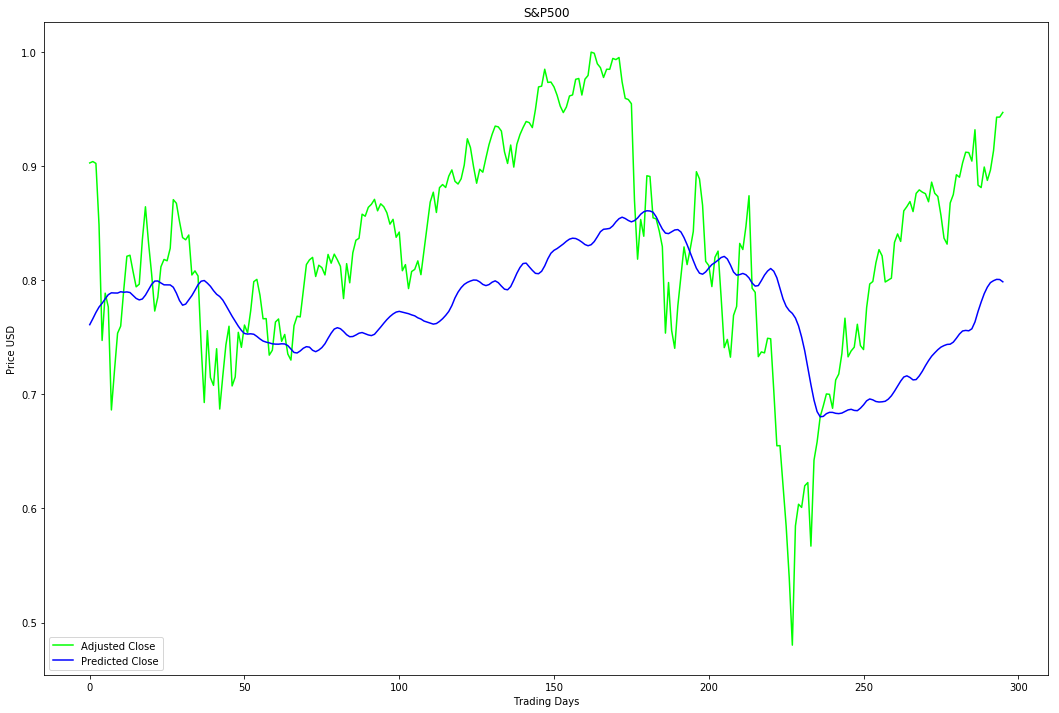

Train Score: 0.00134911 MSE (0.03673023 RMSE)
Test Score: 0.00943965 MSE (0.09715788 RMSE)


In [37]:
def plot_lstm_prediction(actual, prediction, title='S&P500', y_label='Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))
# train_test_split_lstm(normalized_stocks, prediction_time=5, test_data_size=200, unroll_length=50)

## Talk about Improving model

#### We used the mean-squared error (MSE) metric to evaluate the performance of both the regression and neural network model. The MSE for the linear regression model was MSE = 0.7 and R2= 0.68.

#### Basic LSTM Train Score: 0.00115618 MSE (0.03400261 RMSE) Test Score: 0.00687575 MSE (0.08292012 RMSE)

#### Improved LSTM Train Score: 0.00134716 MSE (0.03670364 RMSE) Test Score: 0.00583516 MSE (0.07638822 RMSE)

*(Improved model below)*

## Build the Improved LSTM model

compilation time :  0.04256296157836914
Train on 832 samples, validate on 44 samples
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


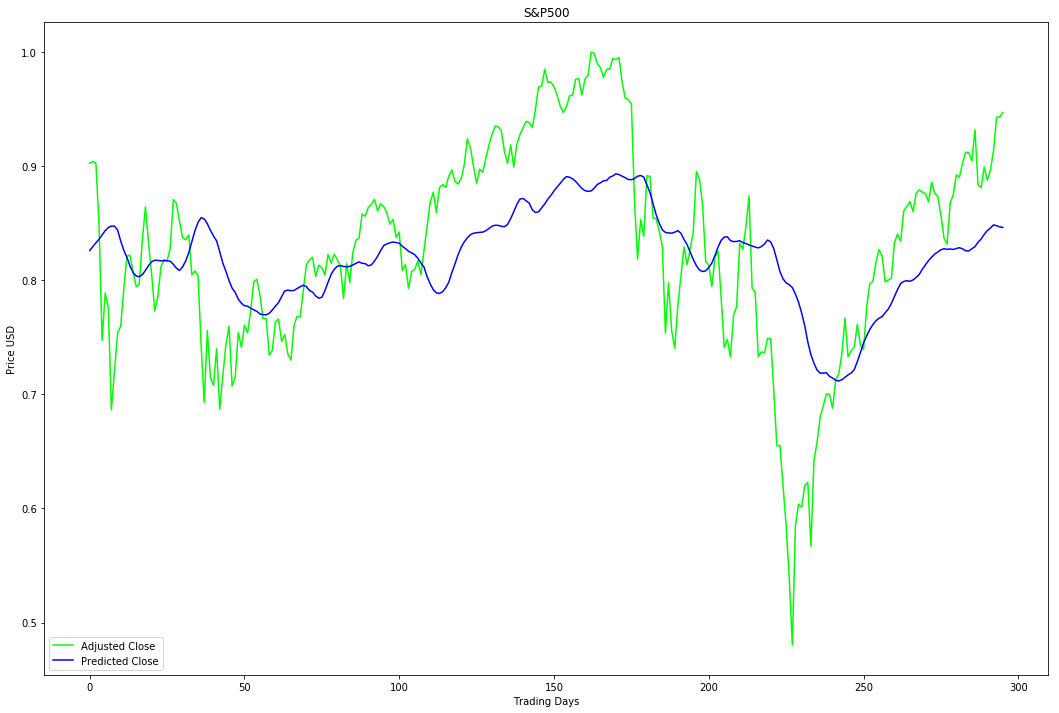

Train Score: 0.00119321 MSE (0.03454294 RMSE)
Test Score: 0.00524538 MSE (0.07242503 RMSE)


In [40]:
# tf.logging.set_verbosity(tf.logging.ERROR)
def build_improved_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.3))
# .4 is best so far

    model.add(LSTM(
        128,
        return_sequences=False))

    # model.add(Dropout(0.2))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    return model


# Set up hyperparameters
batch_size = 50

epochs = 5

# build improved lstm model
model = build_improved_model( xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)
model.fit(xTrain, yTrain, batch_size=batch_size,epochs=epochs,verbose=3,validation_split=0.05)
predictions = model.predict(xTest, batch_size=batch_size)
plot_lstm_prediction(yTest,predictions)
trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))





## Conclusion

#### Based on the results, only a range of potential price is possible for the prediction of S&P 500 stock price. For the LSTM the prediction line is composed of singular prediction points that have true history as prior. While this isn't good to predict next price point, it provides an accurate range of the next price.

#### This project was focused on the S&P 500 index as a whole instead of individual companies. In our future work we will include sentiment analysis from news or tweets to predict predict stock prices for individual companies. Given more time, we would have sought to use more data to use for the LSTM Model in an attempt to make the model and prediction stronger. 